<a href="https://colab.research.google.com/github/geun-hyoung/StockPredictionByTextMining/blob/main/sentiments_analysis_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
import urllib.request
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
data = pd.read_excel('sentiments.xlsx')
print('총 샘플의 수 :',len(data))
data

총 샘플의 수 : 13002


,Senti,Sentences
0,1,"Y, FEBRUARY 9, 2021 â—� WINNIPEGFREEPRESS.COMB..."
1,0,oit three crashes involving Tesla that killed ...
2,0,"rk shadow on Tesla,â€� Wedbush Securities anal..."
3,0,killing a passenger in the Tesla. And on dec. ...
4,0,merican nations in them that could be interest...
...,...,...
12997,0,amp a .28 .04 Kraft Hnz 5.4 29.37 .22 2.6 144....
12998,0,.20 key corp 19.29 -54 -.30 pars Leyen 16.93 ....
12999,0,t 125.26 1.39 technic 20.97 -.37 Tec Kres g 16...
13000,1,64 Tregna .28 top Drin 4.00e to Gib .30 Tenn e...


<Axes: >

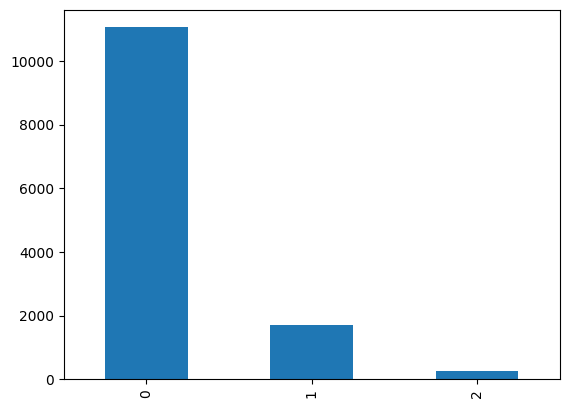

In [4]:
data['Senti'].value_counts().plot(kind='bar')

In [5]:
X_data = data['Sentences']
y_data = data['Senti']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
X_test_encoded = tokenizer.texts_to_sequences(X_test)
print(X_train_encoded[:5])
print(X_test_encoded[:5])


[[326, 186, 628, 71, 55, 150, 152, 595, 25, 129, 1, 4, 1764, 89, 8, 98, 365, 4, 1216, 52, 12, 137, 1027, 1491], [2337, 263, 488, 3, 5694, 42, 355, 1004, 3, 1, 155, 5695, 2185, 1851, 16, 247, 5696, 4809, 687, 188, 1256, 3, 4810, 831, 1948, 1, 36, 190, 7062, 18, 9, 3421, 2866, 566, 483, 3758, 3131], [14, 39, 1492, 1684, 2186, 35, 23, 7063, 4, 6, 28, 2, 154, 1, 4, 414, 114, 5, 126, 9784, 4, 2, 51, 95, 228, 224, 177, 634, 186, 448, 69, 51, 150, 152, 138, 120, 123, 1, 4, 414, 114, 5, 126, 157, 147, 4210, 134, 10, 22, 222], [9785, 572, 4811, 6, 41, 6, 52, 2867, 370, 439, 50, 74, 1, 7, 134, 7064, 429, 31, 99, 1493, 196, 139, 7065, 71, 28, 1852], [5697, 13, 3, 3422, 2187, 3, 170, 190, 1116, 1, 356, 1217, 250, 29, 4211, 9786, 948, 4212, 287]]
[[18, 2093, 267, 1202, 13, 3, 2369, 3323, 8485, 1, 268, 16, 53, 66, 26, 16, 168, 26, 16169, 17, 15, 296, 54, 56, 39, 31, 17, 47, 11, 35, 37, 180, 14, 1, 4, 1615, 28, 68, 68, 11, 15, 165, 8, 50, 64, 70, 17, 194], [6, 445, 484, 10, 146, 126, 111, 2, 47, 8, 2

In [7]:
word_to_index = tokenizer.word_index
vocab_size = len(word_to_index) + 1
print(vocab_size)

19251


본문의 최대 길이 : 345
본문의 평균 길이 : 171.03845784059226


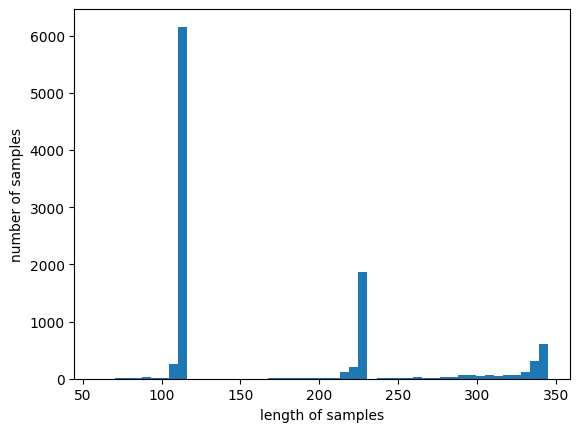

In [8]:
print('본문의 최대 길이 :',max(len(sent) for sent in X_train))
print('본문의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(sent) for sent in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [9]:
max_len = 345

In [10]:
X_train_encoded = pad_sequences(X_train_encoded, maxlen=max_len)
X_test_encoded = pad_sequences(X_test_encoded, maxlen=max_len)

In [13]:
X_train_encoded.shape

(10401, 345)

In [14]:
X_test_encoded.shape

(2601, 345)

In [12]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [15]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [27]:
embedding_dim = 64
hidden_units = 64
num_classes = 3

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(num_classes, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4) # 0.9227 val_loss 감소하지 않으면 중단
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_train_encoded, y_train, epochs=15, callbacks=[es, mc], batch_size=32, validation_split=0.2)


Epoch 1/15
260/260 [==============================] - ETA: 0s - loss: 0.4587 - acc: 0.8519
Epoch 1: val_acc improved from -inf to 0.87218, saving model to best_model.h5
260/260 [==============================] - 78s 294ms/step - loss: 0.4587 - acc: 0.8519 - val_loss: 0.3687 - val_acc: 0.8722
Epoch 2/15


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


260/260 [==============================] - ETA: 0s - loss: 0.2505 - acc: 0.9192
Epoch 2: val_acc improved from 0.87218 to 0.90678, saving model to best_model.h5
260/260 [==============================] - 67s 260ms/step - loss: 0.2505 - acc: 0.9192 - val_loss: 0.3012 - val_acc: 0.9068
Epoch 3/15
260/260 [==============================] - ETA: 0s - loss: 0.1213 - acc: 0.9602
Epoch 3: val_acc improved from 0.90678 to 0.92456, saving model to best_model.h5
260/260 [==============================] - 72s 276ms/step - loss: 0.1213 - acc: 0.9602 - val_loss: 0.2947 - val_acc: 0.9246
Epoch 4/15
260/260 [==============================] - ETA: 0s - loss: 0.0559 - acc: 0.9829
Epoch 4: val_acc did not improve from 0.92456
260/260 [==============================] - 62s 237ms/step - loss: 0.0559 - acc: 0.9829 - val_loss: 0.3107 - val_acc: 0.9231
Epoch 5/15
260/260 [==============================] - ETA: 0s - loss: 0.0341 - acc: 0.9905
Epoch 5: val_acc improved from 0.92456 to 0.92504, saving model to 

In [28]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test_encoded, y_test)[1]))

82/82 [==============================] - 6s 68ms/step - loss: 0.3832 - acc: 0.9227

 테스트 정확도: 0.9227


해당 모델로 예측 (transaction_ratio)

In [26]:

x_pred =
y_pred = loaded_model.predict()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

주가 상승/ 유지/ 하락 데이터와 비교